## Personalized Cancer Diagnosis

**Featurization:** Tfidf Vectorizer

### Exploratory Data Analysis(EDA)

In [1]:
#Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Reading Text Data

In [2]:
#Loading training_text.csv file.
data_text = pd.read_csv('training_text',sep='\|\|',header=None,skiprows=1,names=['ID','Text'],engine='python')
print("Number Data Points: ",data_text.shape[0])
print("Number Features: ",data_text.shape[1])
data_text.head()

Number Data Points:  3321
Number Features:  2


,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


**Text:** Clinical Literature data written by professional doctors.

**Reading Gene and Variation Feature**

In [3]:
#Loading training_variants.csv file.
data_var = pd.read_csv('training_variants')
print("Number of Data points: ",data_var.shape[0])
print("Number of Features: ",data_var.shape[1])
data_var.head()

Number of Data points:  3321
Number of Features:  4


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


**ID:** the id of the row used to link the mutation to the clinical evidence.

**Gene:** the gene where this genetic mutation is located.

**Variation:** the aminoacid change for this mutations.

**Class:** 1-9 the class this genetic mutation has been classified on.

#### Text Preprocessing

In [23]:
#Loading the Stop words from nltk library.
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

snowball_stemmer = SnowballStemmer("english")
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string_1 = ""
        #Replace special chars with space
        total_text = re.sub('[^a-zA-Z0-9\n]',' ',total_text)
        #Replace Multiple spaces with single space.
        total_text = re.sub('\s+',' ',total_text)
        #Convert all upper case words to lower case.
        total_text = total_text.lower()
        #Stop word Removal.
        for word_1 in total_text.split():
            #If the word is not stop word then retain it, otherwise remove it.
            if not word_1 in stop_words:
                string_1 += word_1 + " "
        total_text = string_1
        #Stemming using Snowball Stemmer.
        string_2 = ""
        for word_2 in total_text.split():
            string_2 += snowball_stemmer.stem(word_2) + " "
        total_text = string_2
        #Lemmatizer
        string_3 = ""
        for word_3 in total_text.split():
            string_3 += wordnet_lemmatizer.lemmatize(word_3) + " "
        
        data_text[column][index] = string_3

In [24]:
snowball_stemmer.stem('dependent')

'depend'

In [25]:
#Text Preprocessing stage.
import time
start_time = time.clock()
for index,row in data_text.iterrows():
    nlp_preprocessing(row['Text'], index, 'Text')
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

Time took for preprocessing the text : 6431.570872272881 seconds


In [26]:
#Now joining train_var_df and train_text_df using merge function.
data = pd.merge(data_var, data_text, how='left', on='ID')
data.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,cyclin depend kina cdks regul varieti fundamen...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evid demonstr acquir unipar disomi aupd...
4,4,CBL,L399V,4,oncogen mutat monom casita b lineag lymphoma c...


#### Train,Test and Cross Validation Split

In [27]:
from sklearn.model_selection import train_test_split
y_true = data['Class'].values
data.Gene = data.Gene.str.replace('\s+','_')
data.Variation = data.Variation.str.replace('\s+','_')
#Split the data as train and test 
X_1, X_test, y_1, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.2)
#Split the X_1 and y_1 into train and Cross validate
X_train, X_cv, y_train, y_cv = train_test_split(X_1, y_1, stratify=y_1, test_size=0.2)
print(X_1.head())

        ID    Gene            Variation  Class  \
936    936  PDGFRB  WDR48-PDGFRB_Fusion      2   
1720  1720  KNSTRN                 A40E      1   
1087  1087    EZH2       Overexpression      7   
1976  1976  CTNNB1                 H36P      7   
112    112    MSH6                E946*      4   

                                                   Text  
936   acquir constitut activ protein tyrosin kina ce...  
1720  report discoveri recurr mutat concentr ultravi...  
1087  ezh2 member polycomb group gene import cell cy...  
1976  screen 75 primari hepatocellular carcinoma som...  
112   endometri cancer common gynecolog malign unit ...  


In [28]:
print("Number of data points in Train data:",X_train.shape[0])
print("Number of data points in Cross validation data:",X_cv.shape[0])
print("Number of data points in Test data:",X_test.shape[0])

Number of data points in Train data: 2124
Number of data points in Cross validation data: 532
Number of data points in Test data: 665


#### Distribution of y_i's in Train,Test and Cross Validation datasets

In [29]:
#It returns a dict, keys as class labels and values as the no of data points in the class
train_class_distribution = X_train['Class'].value_counts().sortlevel()
cv_class_distribution = X_cv['Class'].value_counts().sortlevel()
test_class_distribution = X_test['Class'].value_counts().sortlevel()

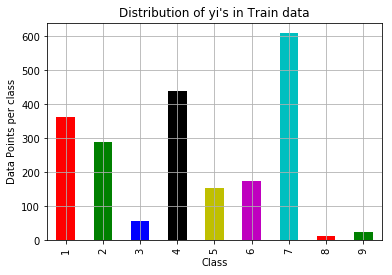

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)


In [30]:
#Class distribution in Train Data.
my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data Points per class')
plt.title("Distribution of yi's in Train data")
plt.grid()
plt.show()

sorted_yi = np.argsort(-train_class_distribution.values)# -(train_class_distribution.values): the minus sign will give us in decreasing order
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/X_train.shape[0]*100), 3), '%)')

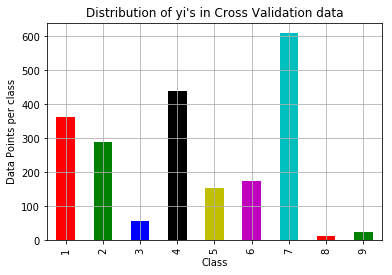

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [31]:
#Class distribution in Cross validation Data
my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data Points per class')
plt.title("Distribution of yi's in Cross Validation data")
plt.grid()
plt.show()

sorted_yi = np.argsort(-cv_class_distribution.values)# -(train_class_distribution.values): the minus sign will give us in decreasing order
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/X_cv.shape[0]*100), 3), '%)')

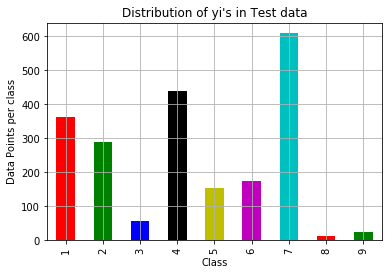

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)


In [32]:
#Class Distribution in Test data
my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data Points per class')
plt.title("Distribution of yi's in Test data")
plt.grid()
plt.show()

sorted_yi = np.argsort(-test_class_distribution.values)# -(train_class_distribution.values): the minus sign will give us in decreasing order
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/X_test.shape[0]*100), 3), '%)')

### Prediction using a Random Model

* In a 'Random Model' we generate nine class probabilities randomly such that they sum to 1.

In [33]:
from sklearn.metrics import confusion_matrix
#This function plot the confusion matrix given y_true and y_pred
def plot_confusion_matrix(test_y,predict_y):
    
    C = confusion_matrix(test_y,predict_y)
    #C is 9x9 confusion matrix
    
    A = (((C.T)/(C.sum(axis=1))).T)
    #Divide each of the elements in a confusion matrix with sum of elements in that column.
    
    B = (C/C.sum(axis=1))
    #Divide each of the elements in a confusion matrix with sum of the elements in the row.
    
    labels = [1,2,3,4,5,6,7,8,9]
    #Represent C in heatmap format
    print("-"*50, "Confusion Matrix", "-"*50)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #Represent A in heatmap format
    print("-"*45, "Recall Matrix (Row Sum=1)", "-"*45)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #Represent B in heatMap format
    print("-"*45, "Precision Matrix (Column Sum=1)", "-"*45)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()



Log loss on Cross Validation data using Random Model 2.4963381822891915
Log loss on Test Data using Random Model 2.4990378915938805
-------------------------------------------------- Confusion Matrix --------------------------------------------------


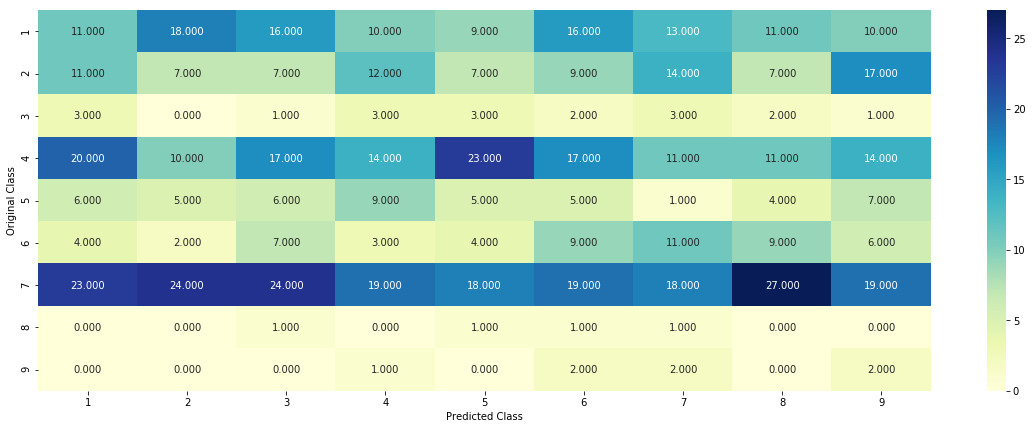

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


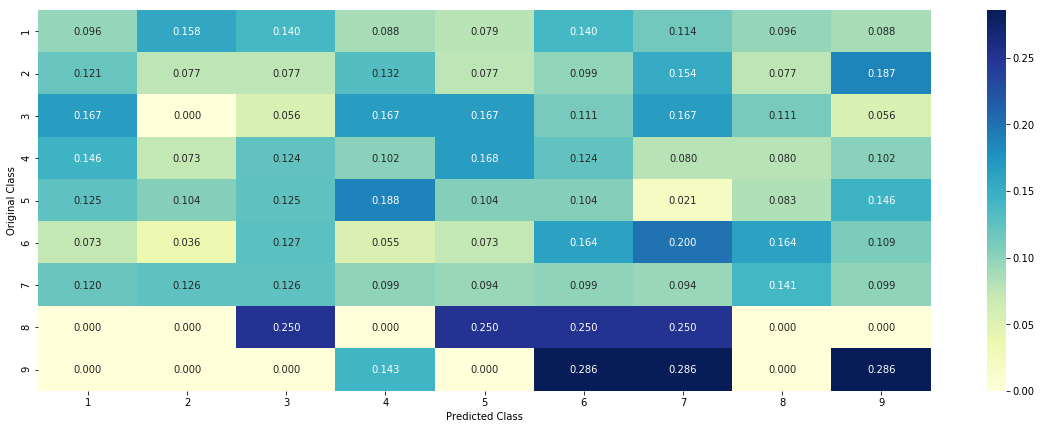

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


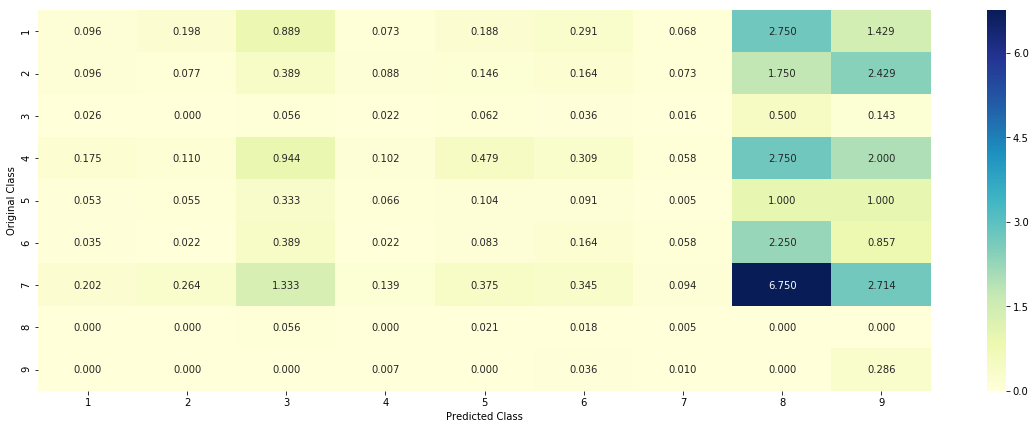

In [34]:
from sklearn.metrics.classification import log_loss
#Need to generate nine probabilities and sum of them is equal to 1.
#Solution is Generate Nine numbers and divide each of the numbers with their sum.
X_test_len = X_test.shape[0]
X_cv_len = X_cv.shape[0]

#We creat a output array that is exactly same as Cv data
y_cv_predicted = np.zeros((X_cv_len,9))
for i in range(X_cv_len):
    rand_probs = np.random.rand(1,9)
    y_cv_predicted[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation data using Random Model", log_loss(y_cv, y_cv_predicted, eps=1e-15))

# Test-Set error.
#we create a output array that has exactly same as the test data
y_test_predicted = np.zeros((X_test_len,9))
for i in range(X_test_len):
    rand_probs = np.random.rand(1,9)
    y_test_predicted[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, y_test_predicted, eps=1e-15))

y_predicted = np.argmax(y_test_predicted,axis=1)
plot_confusion_matrix(y_test, y_predicted+1)

### Univariate Analysis

In [35]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['X_train', 'X_test', 'X_cv']
# algorithm
# -----------------------------------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = X_train[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = X_train.loc[(X_train['Class']==k) & (X_train[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = X_train[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

### Univariate Analysis on Gene feature

**1. What Type of the Feature it is?**
* Categorical Feature

**2. How many Categories are there and How they are distributed?**

In [36]:
unique_genes = X_train['Gene'].value_counts()
print("Number of unique genes:", unique_genes.shape[0])
print(unique_genes.head(10)) #Prints Top 10 Most occuring genes.

Number of unique genes: 232
BRCA1     159
TP53      103
EGFR       94
PTEN       80
BRCA2      76
BRAF       63
KIT        59
ERBB2      54
ALK        43
PIK3CA     41
Name: Gene, dtype: int64


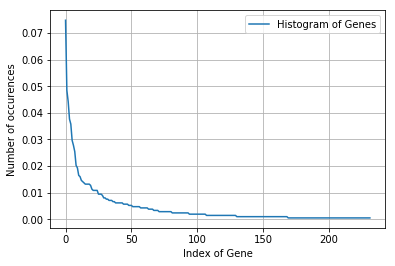

In [37]:
#Gene Distribution (Histogram)
s = sum(unique_genes.values)
h = unique_genes.values/s
plt.plot(h, label="Histogram of Genes")
plt.xlabel("Index of Gene")
plt.ylabel("Number of occurences")
plt.legend()
plt.grid()
plt.show()

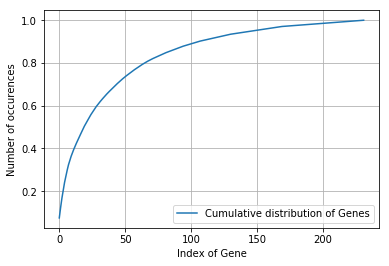

In [38]:
#Cummulative distribution of genes.
c = np.cumsum(h)
plt.plot(c, label='Cumulative distribution of Genes')
plt.xlabel("Index of Gene")
plt.ylabel("Number of occurences")
plt.grid()
plt.legend()
plt.show()

**3.How to Featurize this Gene feature?**
* Tfidf Vectorizer

We will choose the appropriate featurization based on the ML model we use. For this problem of multi-class classification with categorical features, tfidf vectorizer is used for all the models.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Tfidf Vectorizer of the gene feature.
gene_tfidfVectorizer = TfidfVectorizer()
train_gene_feature_tfidfVectorizer = gene_tfidfVectorizer.fit_transform(X_train['Gene'])
cv_gene_feature_tfidfVectorizer = gene_tfidfVectorizer.transform(X_cv['Gene'])
test_gene_feature_tfidfVectorizer = gene_tfidfVectorizer.transform(X_test['Gene'])

In [40]:
#Lets cross check the shape of the data frame
print("The shape of the train_gene_feature_tfidfVectorizer", train_gene_feature_tfidfVectorizer.shape)
print("The shape of the cv_gene_feature_tfidfVectorizer", cv_gene_feature_tfidfVectorizer.shape)
print("The shape of the test_gene_feature_tfidfVectorizer", test_gene_feature_tfidfVectorizer.shape)

The shape of the train_gene_feature_tfidfVectorizer (2124, 231)
The shape of the cv_gene_feature_tfidfVectorizer (532, 231)
The shape of the test_gene_feature_tfidfVectorizer (665, 231)


**4.How good is this feature in predicting y_i's?**

There are Many ways to check it but simplest way is to build a simple Machine Learning Model.

For values of alpha =  1e-05 The log loss is: 1.382667751381044
For values of alpha =  0.0001 The log loss is: 1.18714144593732
For values of alpha =  0.001 The log loss is: 1.2079305740897714
For values of alpha =  0.01 The log loss is: 1.3362127775053403
For values of alpha =  0.1 The log loss is: 1.4412052271760258
For values of alpha =  1 The log loss is: 1.4842650175410599


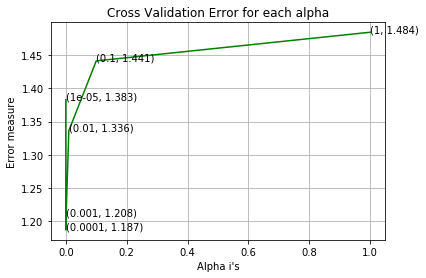

For values of best alpha =  0.0001 The train log loss is: 1.0495610048131163
For values of best alpha =  0.0001 The cross validation log loss is: 1.18714144593732
For values of best alpha =  0.0001 The test log loss is: 1.2029033002359897


In [41]:
#SGD Classifier.
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings("ignore")
#Hyper parameter for SGD classifier
alpha = [10**x for x in range(-5,1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_tfidfVectorizer, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_tfidfVectorizer, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_tfidfVectorizer)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_tfidfVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_tfidfVectorizer, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


**5. Gene Feature stable across all the dataset(Train,Test and CV)**
* Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error.

In [42]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=X_test[X_test['Gene'].isin(list(set(X_train['Gene'])))].shape[0]
cv_coverage=X_cv[X_cv['Gene'].isin(list(set(X_train['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',X_test.shape[0], ":",(test_coverage/X_test.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',X_cv.shape[0],":" ,(cv_coverage/X_cv.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  232  genes in train dataset?
Ans
1. In test data 642 out of 665 : 96.54135338345866
2. In cross validation data 518 out of  532 : 97.36842105263158


### Univariate analysis on Variation Feature

**Q1. What type of the Feature it is?**
* It is Categorical feature.

**Q2. How many Categories are there?**

In [43]:
unique_variations = X_train['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1921
Truncating_Mutations         61
Deletion                     54
Amplification                43
Fusions                      23
Overexpression                4
T58I                          3
G12V                          3
Q61R                          2
A146V                         2
Promoter_Hypermethylation     2
Name: Variation, dtype: int64


In [44]:
print("Ans: There are", unique_variations.shape[0])

Ans: There are 1921


Different categories of variations in the train data, and they are distibuted as follows

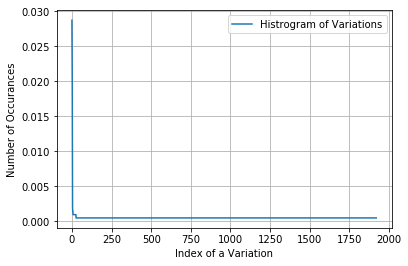

In [45]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.0287194  0.05414313 0.07438795 ... 0.99905838 0.99952919 1.        ]


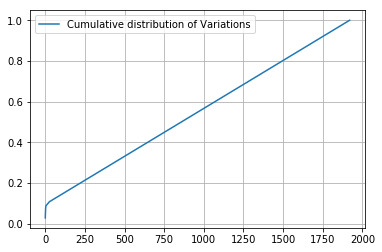

In [46]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

**Q3. How to featurize the Variation Feature?**
* Tfidf Vectorizer

We will use both of the methods to featurize variation feature.

In [47]:
# Tfidf Vectorizer of variation feature.
variation_tfidfVectorizer = TfidfVectorizer()
train_variation_feature_tfidfVectorizer = variation_tfidfVectorizer.fit_transform(X_train['Variation'])
test_variation_feature_tfidfVectorizer = variation_tfidfVectorizer.transform(X_test['Variation'])
cv_variation_feature_tfidfVectorizer = variation_tfidfVectorizer.transform(X_cv['Variation'])

In [48]:
print("The shape of train_variation_feature_tfidfVectorizer is",train_variation_feature_tfidfVectorizer.shape)
print("The shape of cv_variation_feature_tfidfVectorizer is",cv_variation_feature_tfidfVectorizer.shape)
print("The shape of test_variation_feature_tfidfVectorizer is",test_variation_feature_tfidfVectorizer.shape)

The shape of train_variation_feature_tfidfVectorizer is (2124, 1947)
The shape of cv_variation_feature_tfidfVectorizer is (532, 1947)
The shape of test_variation_feature_tfidfVectorizer is (665, 1947)


**Q4. How good is that variation feature in predicting y_i's?**


For values of alpha =  1e-05 The log loss is: 1.7039574496201448
For values of alpha =  0.0001 The log loss is: 1.6928114533218352
For values of alpha =  0.001 The log loss is: 1.6983221590716735
For values of alpha =  0.01 The log loss is: 1.7193470011266838
For values of alpha =  0.1 The log loss is: 1.736212119941309
For values of alpha =  1 The log loss is: 1.736483735043729


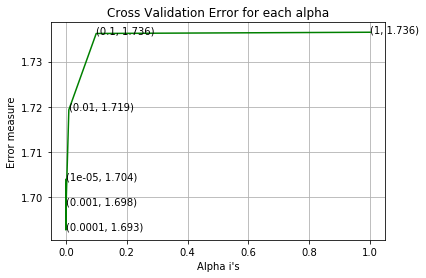

For values of best alpha =  0.0001 The train log loss is: 0.7644142166246736
For values of best alpha =  0.0001 The cross validation log loss is: 1.6928114533218352
For values of best alpha =  0.0001 The test log loss is: 1.7271123678771931


In [49]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_tfidfVectorizer, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_tfidfVectorizer, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_tfidfVectorizer)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_tfidfVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_tfidfVectorizer, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


**Observation:**
* Log loss is less than Random models log loss which is 2.5
* This is an important Feature. 

**Q5. Is this Variation is Stable across all the Data sets(Train, CV and Test)?**

In [50]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=X_test[X_test['Variation'].isin(list(set(X_train['Variation'])))].shape[0]
cv_coverage=X_cv[X_cv['Variation'].isin(list(set(X_train['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',X_test.shape[0], ":",(test_coverage/X_test.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',X_cv.shape[0],":" ,(cv_coverage/X_cv.shape[0])*100)

Q12. How many data points are covered by total  1921  genes in test and cross validation data sets?
Ans
1. In test data 59 out of 665 : 8.87218045112782
2. In cross validation data 56 out of  532 : 10.526315789473683


**Observation:**
* Around 10% of the data is common between Train and CV and also Train and Test.
* This feature is less stable but it is useful feature.

### Univariate Analysis on Text data

**Q1. How Many Words are there in Train data?**

**Q2. How are Words frequencies distributed?**

**Q3. How to featurize the Text data?**

**Q4. Is the Text feature is useful in predicting y_i's?**

**Q5. Is the Text Feature stable across Train, cv and Test?**

In [51]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word
from collections import defaultdict

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['Text'].split():
            dictionary[word] +=1
    return dictionary

In [52]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['Text'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['Text'].split()))
            row_index += 1
    return text_feature_responseCoding

In [53]:
# building a tfidfVectorizer with all the words that occured atleast 3 times in train data
text_tfidfVectorizer = TfidfVectorizer(min_df=5)
train_text_feature_tfidfVectorizer = text_tfidfVectorizer.fit_transform(X_train['Text'])
# getting all the feature names (words)
train_text_features= text_tfidfVectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_tfidfVectorizer.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 31837


In [54]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = X_train[X_train['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(X_train)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [55]:
#Tfidf Vectorizer.
from sklearn.preprocessing import normalize
# don't forget to normalize every feature
train_text_feature_tfidfVectorizer = normalize(train_text_feature_tfidfVectorizer, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_tfidfVectorizer = text_tfidfVectorizer.transform(X_test['Text'])
# don't forget to normalize every feature
test_text_feature_tfidfVectorizer = normalize(test_text_feature_tfidfVectorizer, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_tfidfVectorizer = text_tfidfVectorizer.transform(X_cv['Text'])
# don't forget to normalize every feature
cv_text_feature_tfidfVectorizer = normalize(cv_text_feature_tfidfVectorizer, axis=0)

In [56]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [57]:
# Number of words for a given frequency.
from collections import Counter
print(Counter(sorted_text_occur))

Counter({0.016192340329596763: 316, 0.02668727659115095: 207, 0.05682610670732935: 186, 0.3370600482829763: 152, 0.23920571255710513: 129, 0.05944059054190279: 122, 0.03908468840645933: 107, 0.04692543050845222: 104, 0.04968093916081051: 97, 0.08322510199772565: 93, 0.04396808743849142: 88, 0.0992813571365954: 87, 0.032649410609532935: 84, 0.0429684195864351: 81, 0.025148247807983994: 81, 0.01897771943263258: 74, 0.04458405239220886: 73, 0.025419280790855505: 72, 0.025009543932475974: 71, 0.06830977131803444: 62, 0.07879858254137752: 61, 0.03921532096934851: 58, 0.08868666371539137: 53, 0.12281202296275248: 52, 0.02517423324904845: 50, 0.13714601019831746: 49, 0.05976524984012954: 48, 0.08961672513811383: 46, 0.013874641797072988: 46, 0.011438188021069762: 45, 0.049548941335031564: 44, 0.029484352965870517: 44, 0.06009817698125099: 43, 0.07156531102173691: 42, 0.05116557646524722: 42, 0.02559141870558896: 41, 0.17873563311580026: 40, 0.05619651325025886: 40, 0.04590360592028467: 39, 0.

For values of alpha =  1e-05 The log loss is: 1.2953076141765125
For values of alpha =  0.0001 The log loss is: 1.2205275586216124
For values of alpha =  0.001 The log loss is: 1.1383773692258035
For values of alpha =  0.01 The log loss is: 1.2203213568702171
For values of alpha =  0.1 The log loss is: 1.3716823798786695
For values of alpha =  1 The log loss is: 1.5909491164587628


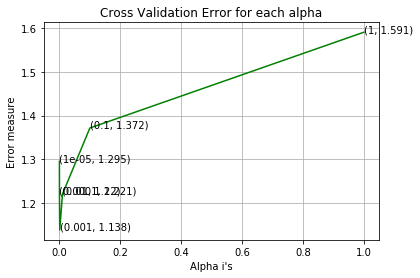

For values of best alpha =  0.001 The train log loss is: 0.6377124573964651
For values of best alpha =  0.001 The cross validation log loss is: 1.1383773692258035
For values of best alpha =  0.001 The test log loss is: 1.2289189603435842


In [58]:
# Train a Logistic regression+Calibration model using text features whicha re tfidf vectorizer
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_tfidfVectorizer, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_tfidfVectorizer, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_tfidfVectorizer)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_tfidfVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_tfidfVectorizer, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


**Q. Is the Text feature stable across all the data sets (Test, Train, Cross validation)?**

In [59]:
def get_intersec_text(df):
    df_text_vec = TfidfVectorizer(min_df=5)
    df_text_fea = df_text_vec.fit_transform(df['Text'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [60]:
len1,len2 = get_intersec_text(X_test)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(X_cv)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

99.571 % of word of test data appeared in train data
99.753 % of word of Cross Validation appeared in train data


**Observation:**
* The text feature is Stable across all the Train, test and Cross Validation.

### Machine Learning Models

In [61]:
#Data preparation for ML models.

#Misc. functionns for ML models

def predict_and_plot_confusion_matrix(train_x, train_y, test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [62]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [63]:
# This function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_tfidf_vec = TfidfVectorizer()
    var_tfidf_vec = TfidfVectorizer()
    text_tfidf_vec = TfidfVectorizer(min_df=5)
    
    gene_vec = gene_tfidf_vec.fit(X_train['Gene'])
    var_vec  = var_tfidf_vec.fit(X_train['Variation'])
    text_vec = text_tfidf_vec.fit(X_train['Text'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_tfidf_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

### Stacking Three Features

In [88]:
from scipy.sparse import hstack
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

#TfidfVectorizer
train_gene_var_tfidfVectorizer = hstack((train_gene_feature_tfidfVectorizer,train_variation_feature_tfidfVectorizer))
test_gene_var_tfidfVectorizer = hstack((test_gene_feature_tfidfVectorizer,test_variation_feature_tfidfVectorizer))
cv_gene_var_tfidfVectorizer = hstack((cv_gene_feature_tfidfVectorizer,cv_variation_feature_tfidfVectorizer))

train_x_tfidfVectorizer = hstack((train_gene_var_tfidfVectorizer, train_text_feature_tfidfVectorizer)).tocsr()
train_y = np.array(list(X_train['Class']))

test_x_tfidfVectorizer = hstack((test_gene_var_tfidfVectorizer, test_text_feature_tfidfVectorizer)).tocsr()
test_y = np.array(list(X_test['Class']))

cv_x_tfidfVectorizer = hstack((cv_gene_var_tfidfVectorizer, cv_text_feature_tfidfVectorizer)).tocsr()
cv_y = np.array(list(X_cv['Class']))


In [89]:
import pickle
with open('train_x.pickle', 'wb') as handle:
    pickle.dump(train_x_tfidfVectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('cv_x.pickle', 'wb') as handle:
    pickle.dump(cv_x_tfidfVectorizer,handle,protocol=pickle.HIGHEST_PROTOCOL)

with open('test_x.pickle', 'wb') as handle:
    pickle.dump(test_x_tfidfVectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('train_y.pickle', 'wb') as handle:
    pickle.dump(train_y, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('cv_y.pickle', 'wb') as handle:
    pickle.dump(cv_y, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('test_y.pickle', 'wb') as handle:
    pickle.dump(test_y, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [65]:
print("TfidfVectorizer features :")
print("(number of data points * number of features) in train data = ", train_x_tfidfVectorizer.shape)
print("(number of data points * number of features) in test data = ", test_x_tfidfVectorizer.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_tfidfVectorizer.shape)

TfidfVectorizer features :
(number of data points * number of features) in train data =  (2124, 34015)
(number of data points * number of features) in test data =  (665, 34015)
(number of data points * number of features) in cross validation data = (532, 34015)


### BaseLine Models

### Naive Bayes

#### Hyperparameter Tuning:

for alpha = 1e-05
Log Loss : 1.288815280346769
for alpha = 0.0001
Log Loss : 1.2859373362092954
for alpha = 0.001
Log Loss : 1.285632289119187
for alpha = 0.1
Log Loss : 1.2611519342622397
for alpha = 1
Log Loss : 1.2346063765270119
for alpha = 10
Log Loss : 1.307887802362741
for alpha = 100
Log Loss : 1.2159213305736225
for alpha = 1000
Log Loss : 1.183867025837247


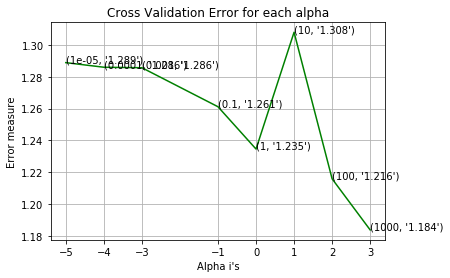

For values of best alpha =  1000 The train log loss is: 0.9809664912625198
For values of best alpha =  1000 The cross validation log loss is: 1.183867025837247
For values of best alpha =  1000 The test log loss is: 1.2468157748917295


In [66]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification

from sklearn.naive_bayes import MultinomialNB

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_tfidfVectorizer, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidfVectorizer, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidfVectorizer)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_tfidfVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, y_train)


predict_y = sig_clf.predict_proba(train_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


#### Testing Model with best HyperParameter

Log Loss : 1.2468157748917295
Number of missclassified point : 0.4266917293233083
-------------------------------------------------- Confusion Matrix --------------------------------------------------


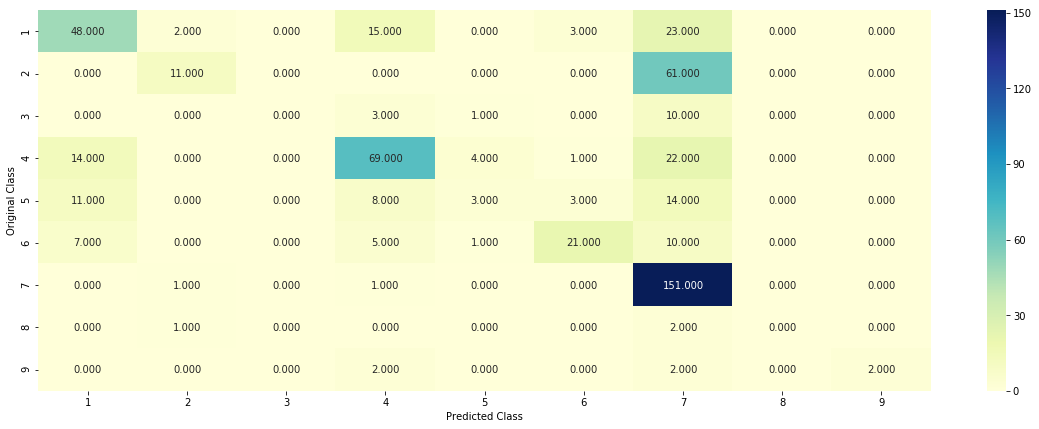

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


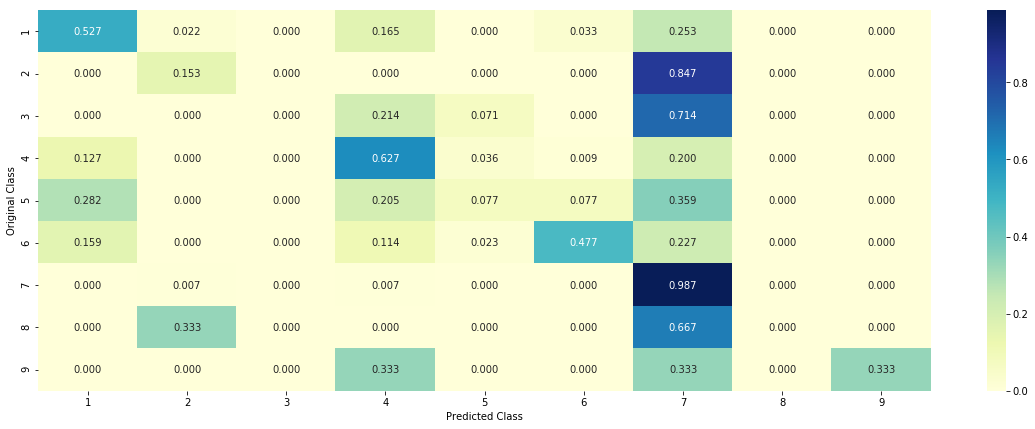

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


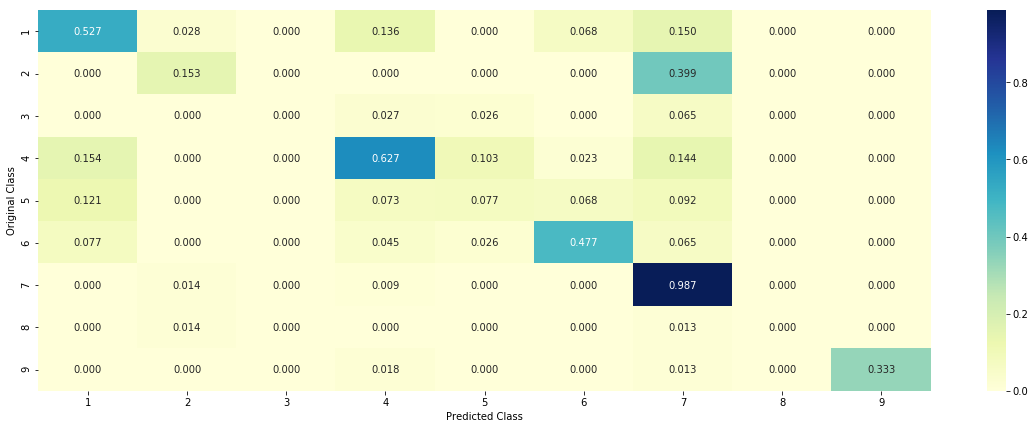

In [67]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X

# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_tfidfVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, y_train)
sig_clf_probs = sig_clf.predict_proba(test_x_tfidfVectorizer)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(y_test, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_tfidfVectorizer)- y_cv))/y_cv.shape[0])
plot_confusion_matrix(y_cv, sig_clf.predict(cv_x_tfidfVectorizer.toarray()))

#### Feature Importance, Correctly Classified Point

In [68]:
test_point_index = 131
no_feature = 100
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidfVectorizer[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[8.950e-02 8.610e-02 3.400e-03 1.130e-01 2.820e-02 2.200e-02 6.548e-01
  2.800e-03 2.000e-04]]
Actual Class : 7
--------------------------------------------------
15 Text feature [cell] present in test data point [True]
16 Text feature [contrast] present in test data point [True]
17 Text feature [activ] present in test data point [True]
18 Text feature [express] present in test data point [True]
19 Text feature [kina] present in test data point [True]
21 Text feature [increa] present in test data point [True]
22 Text feature [presenc] present in test data point [True]
23 Text feature [signal] present in test data point [True]
24 Text feature [suggest] present in test data point [True]
25 Text feature [wa] present in test data point [True]
26 Text feature [similar] present in test data point [True]
27 Text feature [shown] present in test data point [True]
28 Text feature [also] present in test data point [True]
29 Text feature [recent]

#### Feature Importance, InCorrectly Classified point

In [69]:
test_point_index = 10
no_feature = 100
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidfVectorizer[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.179  0.0938 0.0119 0.3655 0.0477 0.0395 0.2556 0.0055 0.0015]]
Actual Class : 4
--------------------------------------------------
9 Text feature [protein] present in test data point [True]
11 Text feature [indic] present in test data point [True]
12 Text feature [relat] present in test data point [True]
13 Text feature [function] present in test data point [True]
14 Text feature [experi] present in test data point [True]
15 Text feature [determin] present in test data point [True]
16 Text feature [result] present in test data point [True]
17 Text feature [shown] present in test data point [True]
20 Text feature [import] present in test data point [True]
21 Text feature [abil] present in test data point [True]
22 Text feature [inactiv] present in test data point [True]
23 Text feature [acid] present in test data point [True]
24 Text feature [transfect] present in test data point [True]
25 Text feature [lack] present in test data po

### K-Nearest Neighbour Classifier

#### HyperParameter Tuning

for alpha = 5
Log Loss : 1.2016998137401167
for alpha = 11
Log Loss : 1.2351636136202302
for alpha = 15
Log Loss : 1.2775811655327478
for alpha = 21
Log Loss : 1.3167952279766328
for alpha = 31
Log Loss : 1.3348595914506485
for alpha = 41
Log Loss : 1.359657131360084
for alpha = 51
Log Loss : 1.4107714429426517
for alpha = 99
Log Loss : 1.344208777444835


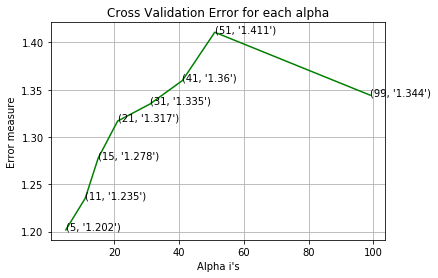

For values of best alpha =  5 The train log loss is: 0.9245305533373787
For values of best alpha =  5 The cross validation log loss is: 1.2016998137401167
For values of best alpha =  5 The test log loss is: 1.2608267255559578


In [70]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification.

from sklearn.neighbors import KNeighborsClassifier
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_tfidfVectorizer, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidfVectorizer, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidfVectorizer)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_tfidfVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, y_train)

predict_y = sig_clf.predict_proba(train_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


#### Testing the Model with best hyperparameter

Log loss : 1.2016998137401167
Number of mis-classified points : 0.41541353383458646
-------------------------------------------------- Confusion Matrix --------------------------------------------------


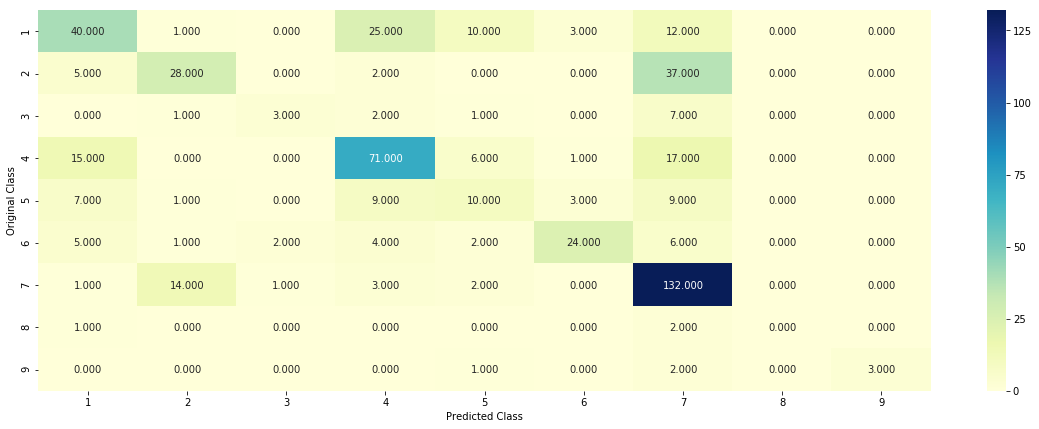

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


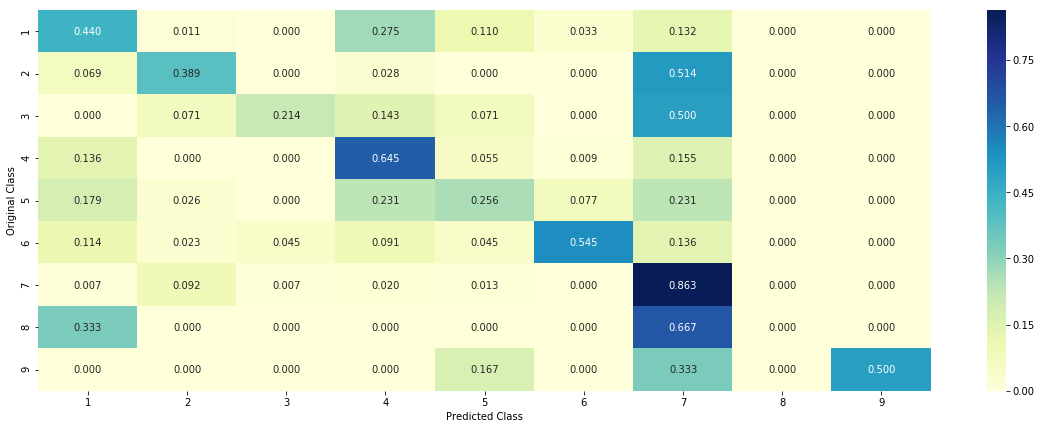

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


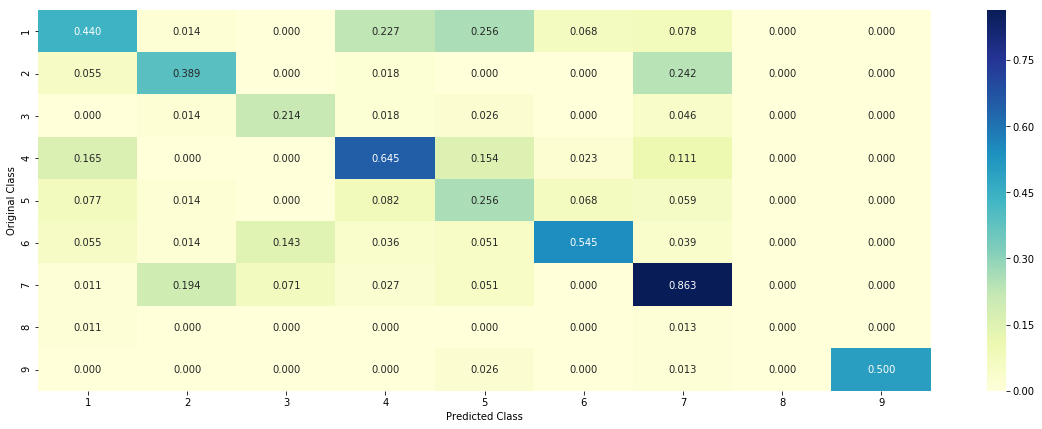

In [71]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#---------------------------------------------------------------------------
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_tfidfVectorizer, y_train, cv_x_tfidfVectorizer, y_cv, clf)

#### Sample Query Point-1

In [72]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_tfidfVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, y_train)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", y_test[test_point_index])
neighbors = clf.kneighbors(test_x_tfidfVectorizer[test_point_index], alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",y_train[neighbors[1][0]])
print("Fequency of nearest points :",Counter(y_train[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 5
The  5  nearest neighbours of the test points belongs to classes [5 7 7 3 7]
Fequency of nearest points : Counter({7: 3, 5: 1, 3: 1})


#### Sample Query Point-2

In [73]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha], algorithm='brute')
clf.fit(train_x_tfidfVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, y_train)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", y_test[test_point_index])
neighbors = clf.kneighbors(test_x_tfidfVectorizer[test_point_index], alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",y_train[neighbors[1][0]])
print("Fequency of nearest points :",Counter(y_train[neighbors[1][0]]))

Predicted Class : 6
Actual Class : 6
the k value for knn is 5 and the nearest neighbours of the test points belongs to classes [6 6 6 6 6]
Fequency of nearest points : Counter({6: 5})


### Logistic Regression(With Class balancing)

#### HyperParameter Tuning

for alpha = 1e-06
Log Loss : 1.270850322923146
for alpha = 1e-05
Log Loss : 1.2494055559901842
for alpha = 0.0001
Log Loss : 1.1562230633887265
for alpha = 0.001
Log Loss : 1.0239681733039472
for alpha = 0.01
Log Loss : 1.0573817098988305
for alpha = 0.1
Log Loss : 1.2863010646355704
for alpha = 1
Log Loss : 1.5161438021450728
for alpha = 10
Log Loss : 1.546936431607623
for alpha = 100
Log Loss : 1.5502222154820358


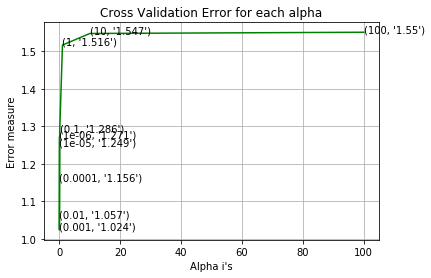

For values of best alpha =  0.001 The train log loss is: 0.5385081286528152
For values of best alpha =  0.001 The cross validation log loss is: 1.0239681733039472
For values of best alpha =  0.001 The test log loss is: 1.1444485995453142


In [74]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# -------------------------------------------------------------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------------------------------------------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#---------------------------------------------------------------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_tfidfVectorizer, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidfVectorizer, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidfVectorizer)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_tfidfVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, y_train)

predict_y = sig_clf.predict_proba(train_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### Testing the Model with best hyperParameter

Log loss : 1.0239681733039472
Number of mis-classified points : 0.3308270676691729
-------------------------------------------------- Confusion Matrix --------------------------------------------------


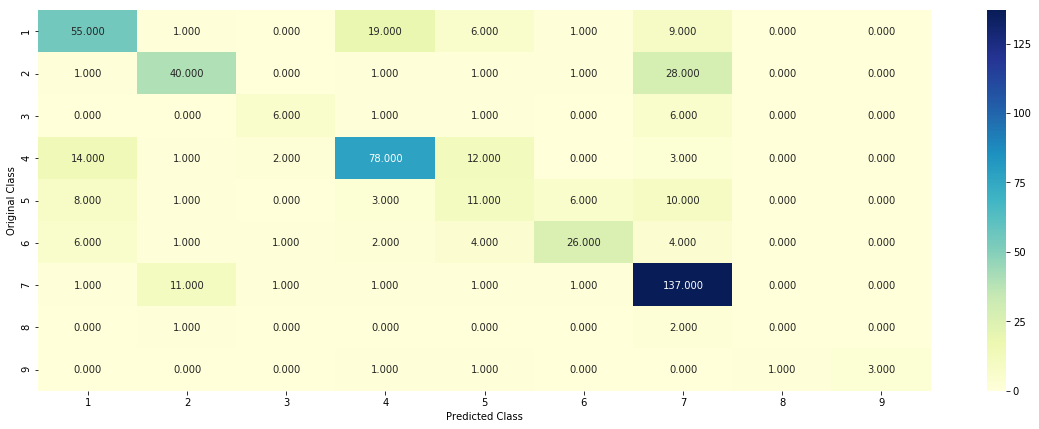

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


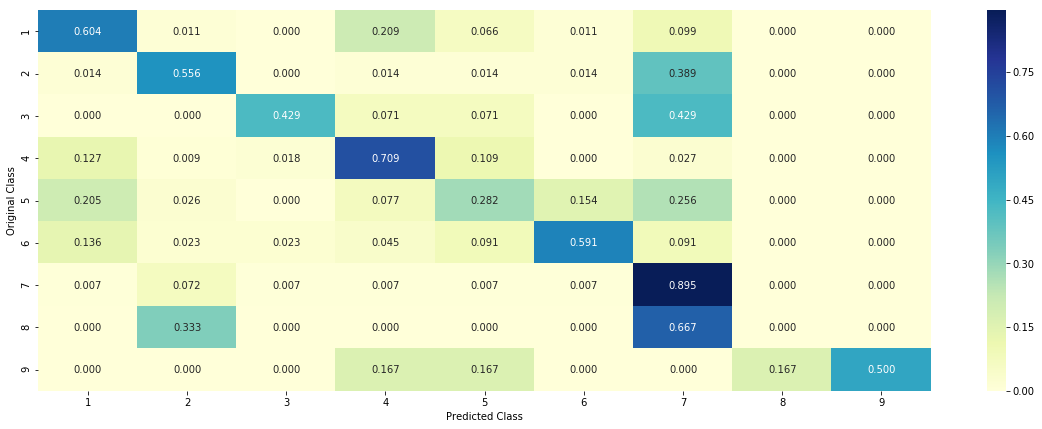

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


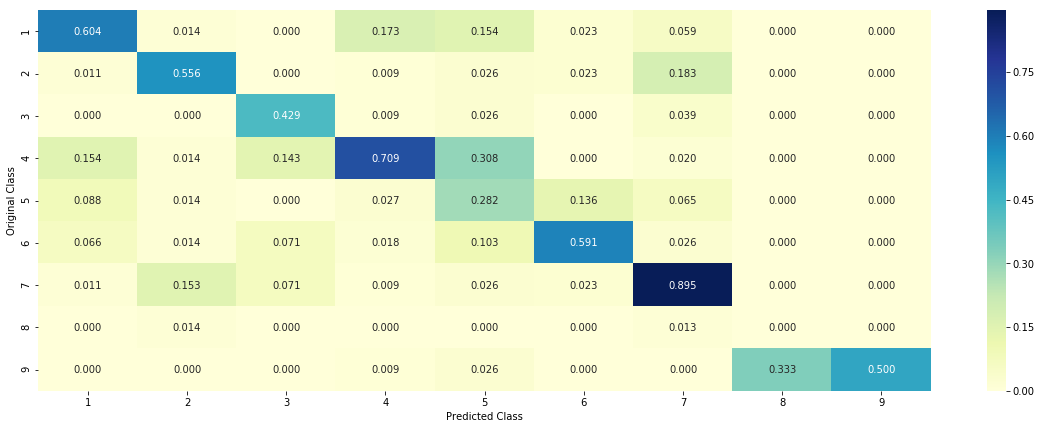

In [75]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)
# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_tfidfVectorizer, y_train, cv_x_tfidfVectorizer, y_cv, clf)

#### Feature Importance

In [76]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_tfidfVectorizer.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

#### Incorrectly Classified Point

In [77]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_tfidfVectorizer,y_train)
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidfVectorizer[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.0096 0.0199 0.0032 0.0104 0.0275 0.9162 0.0076 0.0032 0.0025]]
Actual Class : 6
--------------------------------------------------
149 Text feature [ivs2] present in test data point [True]
151 Text feature [v1804d] present in test data point [True]
205 Text feature [usb] present in test data point [True]
212 Text feature [exosap] present in test data point [True]
238 Text feature [a1170v] present in test data point [True]
239 Text feature [m784v] present in test data point [True]
240 Text feature [avgd] present in test data point [True]
241 Text feature [n1878k] present in test data point [True]
242 Text feature [h1966i] present in test data point [True]
243 Text feature [s127n] present in test data point [True]
244 Text feature [12delta] present in test data point [True]
247 Text feature [dnastar] present in test data point [True]
250 Text feature [fell] present in test data point [True]
258 Text feature [alphaimag] present in tes

#### Correctly Classified Point

In [78]:
test_point_index = 122
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidfVectorizer[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[1.400e-03 2.670e-02 1.000e-04 1.000e-03 6.200e-03 1.500e-03 9.598e-01
  2.000e-03 1.200e-03]]
Actual Class : 7
--------------------------------------------------
18 Text feature [constitut] present in test data point [True]
21 Text feature [thyroid] present in test data point [True]
34 Text feature [oncogen] present in test data point [True]
61 Text feature [transform] present in test data point [True]
65 Text feature [murin] present in test data point [True]
71 Text feature [ran] present in test data point [True]
72 Text feature [intrin] present in test data point [True]
102 Text feature [downstream] present in test data point [True]
122 Text feature [grew] present in test data point [True]
141 Text feature [3t3] present in test data point [True]
180 Text feature [overexpress] present in test data point [True]
209 Text feature [ic90] present in test data point [True]
244 Text feature [receptor] present in test data point [True]
292 

### Logistic Regression(Without Class balancing) 

#### HyperParameter Tuning

for alpha = 1e-06
Log Loss : 1.2385019902021237
for alpha = 1e-05
Log Loss : 1.2175816059144395
for alpha = 0.0001
Log Loss : 1.1857846188384131
for alpha = 0.001
Log Loss : 1.0476021620648972
for alpha = 0.01
Log Loss : 1.1234758962382012
for alpha = 0.1
Log Loss : 1.2545449180699806
for alpha = 1
Log Loss : 1.4692778130561814


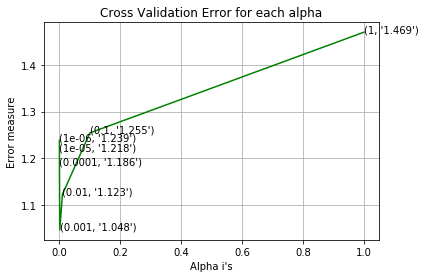

For values of best alpha =  0.001 The train log loss is: 0.5254832804398522
For values of best alpha =  0.001 The cross validation log loss is: 1.0476021620648972
For values of best alpha =  0.001 The test log loss is: 1.175482407696458


In [79]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------------------------------------------------------------------

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_tfidfVectorizer, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidfVectorizer, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidfVectorizer)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_tfidfVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, y_train)

predict_y = sig_clf.predict_proba(train_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### Testing Model with best HyperParameter

Log loss : 1.0476021620648972
Number of mis-classified points : 0.3383458646616541
-------------------------------------------------- Confusion Matrix --------------------------------------------------


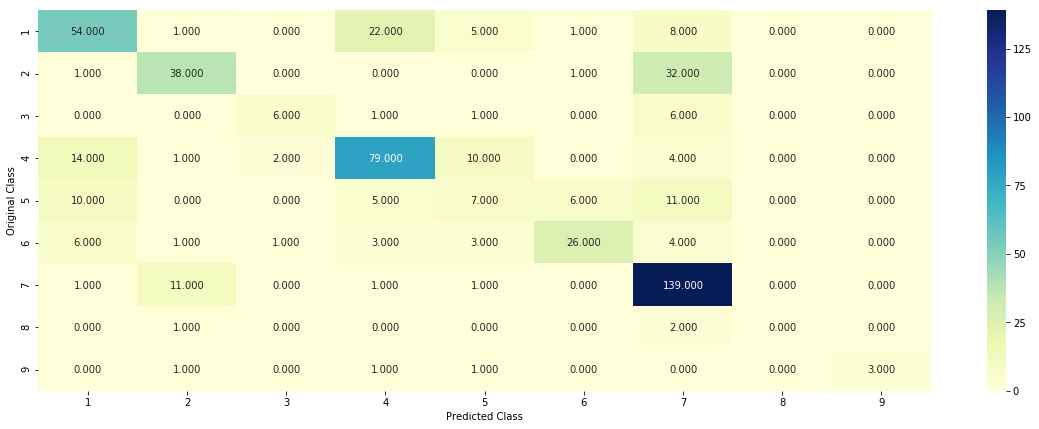

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


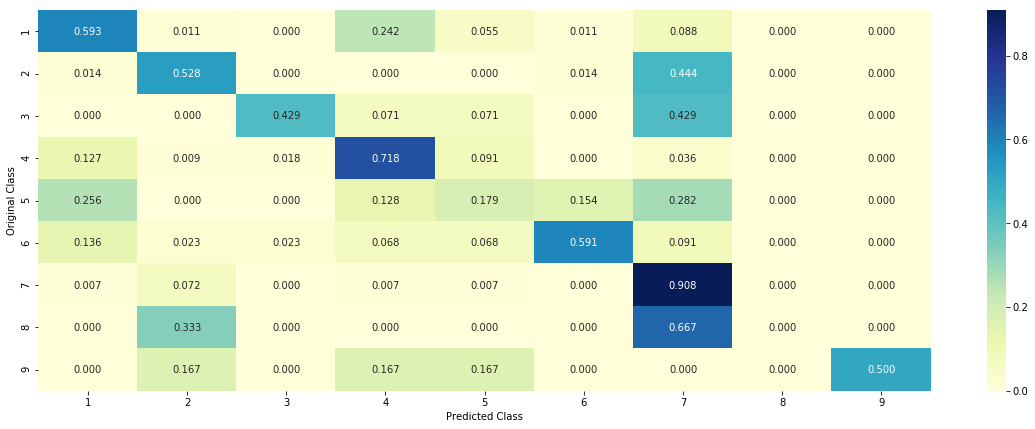

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


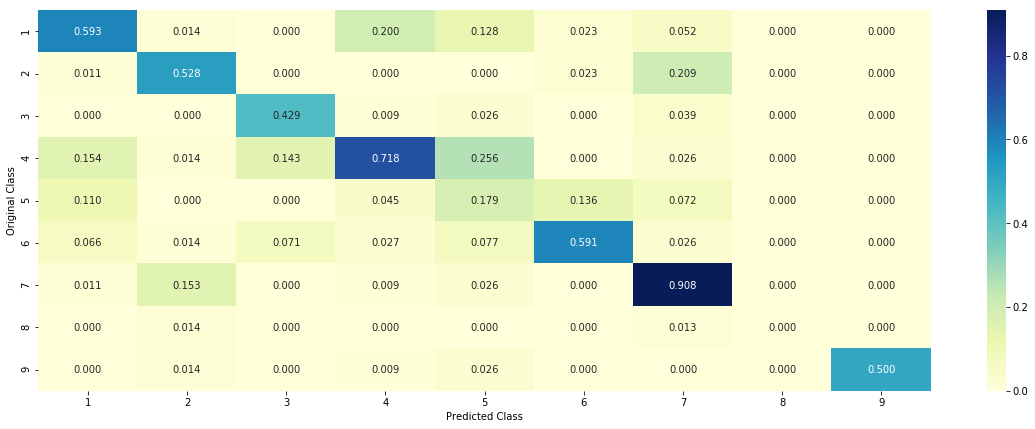

In [80]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.
#------------------------------------------------------------------------------------------------

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_tfidfVectorizer, y_train, cv_x_tfidfVectorizer, y_cv, clf)

#### Feature Importance, Correctly Classified Point

In [81]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_tfidfVectorizer,y_train)
test_point_index = 90
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidfVectorizer[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[2.28e-02 6.94e-02 5.10e-03 3.52e-02 9.70e-03 6.80e-03 8.49e-01 1.70e-03
  3.00e-04]]
Actual Class : 7
--------------------------------------------------
29 Text feature [constitut] present in test data point [True]
68 Text feature [stat] present in test data point [True]
70 Text feature [transform] present in test data point [True]
103 Text feature [ligand] present in test data point [True]
107 Text feature [mitogen] present in test data point [True]
115 Text feature [overexpress] present in test data point [True]
143 Text feature [houston] present in test data point [True]
150 Text feature [downstream] present in test data point [True]
154 Text feature [murin] present in test data point [True]
204 Text feature [serum] present in test data point [True]
235 Text feature [enhanc] present in test data point [True]
266 Text feature [receptor] present in test data point [True]
291 Text feature [phospho] present in test data point [True]
2

#### Feature Importance, Incorrectly Classified Point

In [82]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidfVectorizer[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[1.160e-02 2.210e-02 1.300e-03 1.200e-02 2.080e-02 9.203e-01 1.080e-02
  9.000e-04 1.000e-04]]
Actual Class : 6
--------------------------------------------------
122 Text feature [ivs2] present in test data point [True]
175 Text feature [usb] present in test data point [True]
182 Text feature [exosap] present in test data point [True]
194 Text feature [v1804d] present in test data point [True]
202 Text feature [m784v] present in test data point [True]
203 Text feature [a1170v] present in test data point [True]
204 Text feature [h1966i] present in test data point [True]
205 Text feature [avgd] present in test data point [True]
206 Text feature [12delta] present in test data point [True]
207 Text feature [s127n] present in test data point [True]
208 Text feature [n1878k] present in test data point [True]
210 Text feature [dnastar] present in test data point [True]
218 Text feature [fell] present in test data point [True]
220 Text featu

### Linear SVM

#### HyperParameter Tuning

for C = 1e-05
Log Loss : 1.2235578838841765
for C = 0.0001
Log Loss : 1.2168572169436076
for C = 0.001
Log Loss : 1.1528229921699393
for C = 0.01
Log Loss : 1.0796081588323025
for C = 0.1
Log Loss : 1.2357063830673276
for C = 1
Log Loss : 1.5507401047015463
for C = 10
Log Loss : 1.5508319613124386
for C = 100
Log Loss : 1.5508319616902722


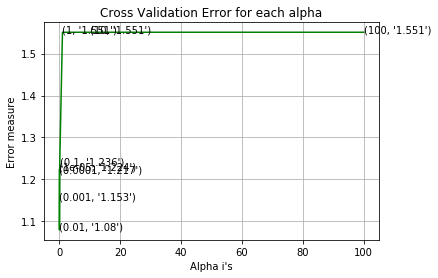

For values of best alpha =  0.01 The train log loss is: 0.7235352900602648
For values of best alpha =  0.01 The cross validation log loss is: 1.0796081588323025
For values of best alpha =  0.01 The test log loss is: 1.1659342556686358


In [83]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# -----------------------------------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#----------------------------------------------------------------------------------

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_tfidfVectorizer, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidfVectorizer, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidfVectorizer)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_tfidfVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, y_train)

predict_y = sig_clf.predict_proba(train_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### Testing Model with best HyperParameter

Log loss : 1.0796081588323025
Number of mis-classified points : 0.36654135338345867
-------------------------------------------------- Confusion Matrix --------------------------------------------------


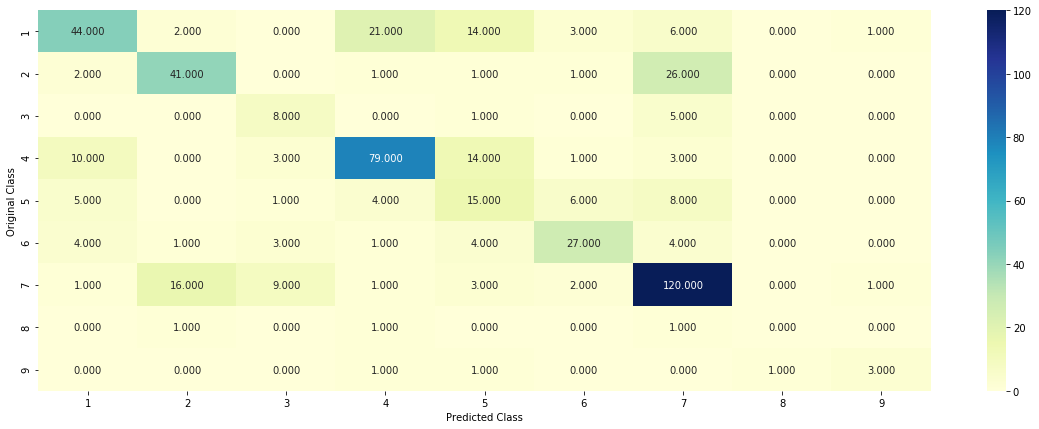

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


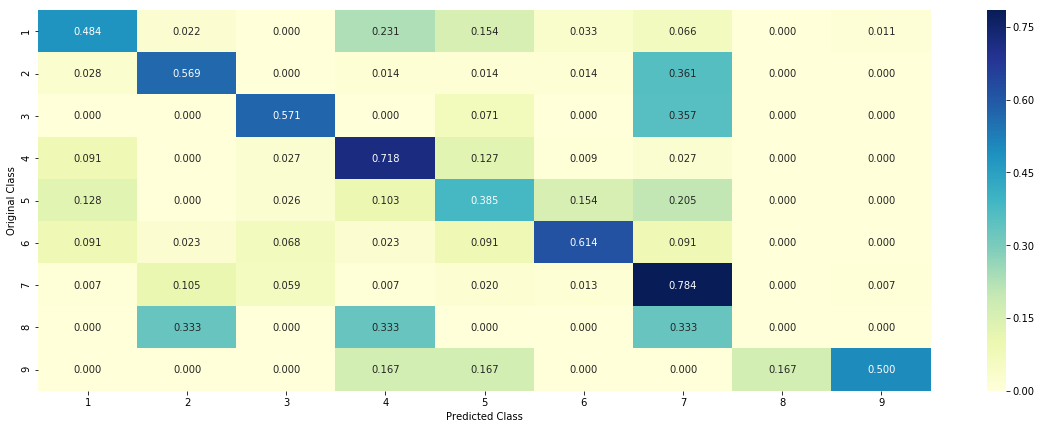

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


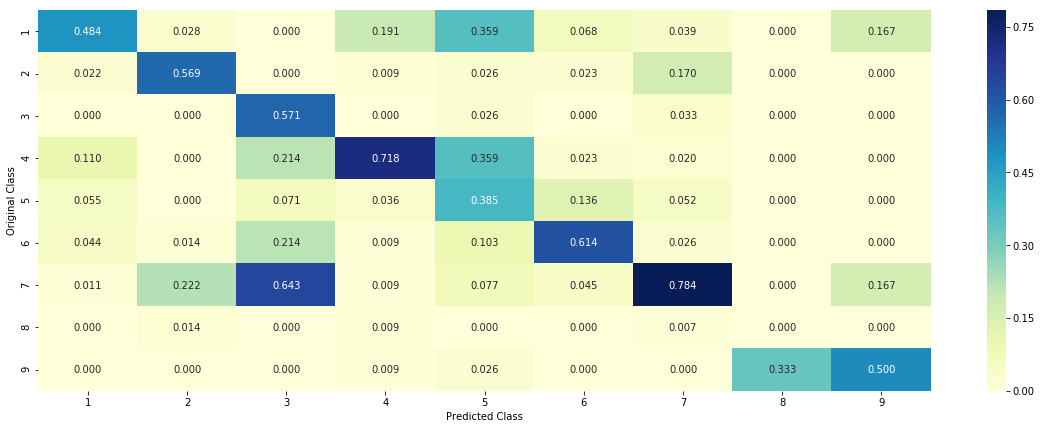

In [84]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.

# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_tfidfVectorizer, y_train, cv_x_tfidfVectorizer, y_cv, clf)

#### Feature Importance, Correctly Classified Point

In [85]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_tfidfVectorizer,y_train)
#test_point_index = 1
test_point_index = 110
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidfVectorizer[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.148  0.0775 0.0103 0.5899 0.0377 0.0306 0.0941 0.0057 0.0062]]
Actual Class : 4
--------------------------------------------------
18 Text feature [cycloheximid] present in test data point [True]
83 Text feature [microscopi] present in test data point [True]
101 Text feature [instabl] present in test data point [True]
117 Text feature [het] present in test data point [True]
186 Text feature [kdm5d] present in test data point [True]
203 Text feature [nonsen] present in test data point [True]
263 Text feature [disturb] present in test data point [True]
310 Text feature [undetect] present in test data point [True]
384 Text feature [vectashield] present in test data point [True]
492 Text feature [hcl] present in test data point [True]
494 Text feature [dapi] present in test data point [True]
Out of the top  500  features  11 are present in query point


#### Incorrectly classified point

In [86]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidfVectorizer[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.0219 0.0279 0.0055 0.0369 0.0204 0.8514 0.0322 0.0023 0.0016]]
Actual Class : 6
--------------------------------------------------
1 Text feature [s127n] present in test data point [True]
2 Text feature [a1170v] present in test data point [True]
3 Text feature [n1878k] present in test data point [True]
4 Text feature [avgd] present in test data point [True]
5 Text feature [m784v] present in test data point [True]
6 Text feature [h1966i] present in test data point [True]
7 Text feature [12delta] present in test data point [True]
8 Text feature [dnastar] present in test data point [True]
9 Text feature [a4] present in test data point [True]
10 Text feature [and6] present in test data point [True]
11 Text feature [alphaimag] present in test data point [True]
12 Text feature [innotech] present in test data point [True]
13 Text feature [leandro] present in test data point [True]
14 Text feature [2401] present in test data point [True]
1

### Kernal SVM

In [53]:
from sklearn.svm import SVC
clf = SVC(C=10000,kernel='rbf',probability=True, class_weight='balanced')
#clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_tfidfVectorizer, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, train_y)

predict_y = sig_clf.predict_proba(test_x_tfidfVectorizer)
print('For values of best alpha = 10000', "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of best alpha = 10000 The test log loss is: 1.0593378787417522


### Random Forest Classifier

#### HyperParameter Tuning (Tfidf Vectorizer)

In [68]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_tfidfVectorizer, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_tfidfVectorizer, y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_x_tfidfVectorizer)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_tfidfVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, y_train)

predict_y = sig_clf.predict_proba(train_x_tfidfVectorizer)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidfVectorizer)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidfVectorizer)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.2543248236051565
for n_estimators = 100 and max depth =  10
Log Loss : 1.1644338549419442
for n_estimators = 200 and max depth =  5
Log Loss : 1.2364383715145488
for n_estimators = 200 and max depth =  10
Log Loss : 1.1600197327105874
for n_estimators = 500 and max depth =  5
Log Loss : 1.217842323856027
for n_estimators = 500 and max depth =  10
Log Loss : 1.1516903304034813
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2125770932106967
for n_estimators = 1000 and max depth =  10
Log Loss : 1.1503083329920016
for n_estimators = 2000 and max depth =  5
Log Loss : 1.2099902243060923
for n_estimators = 2000 and max depth =  10
Log Loss : 1.1489583095286018
For values of best estimator =  2000 The train log loss is: 0.664169322081728
For values of best estimator =  2000 The cross validation log loss is: 1.1489581087644465
For values of best estimator =  2000 The test log loss is: 1.1774739692066194


#### Testing the Model with best HyperParameter(Tfidf Vectorizer)

Log loss : 1.1489583095286018
Number of mis-classified points : 0.36466165413533835
-------------------------------------------------- Confusion Matrix --------------------------------------------------


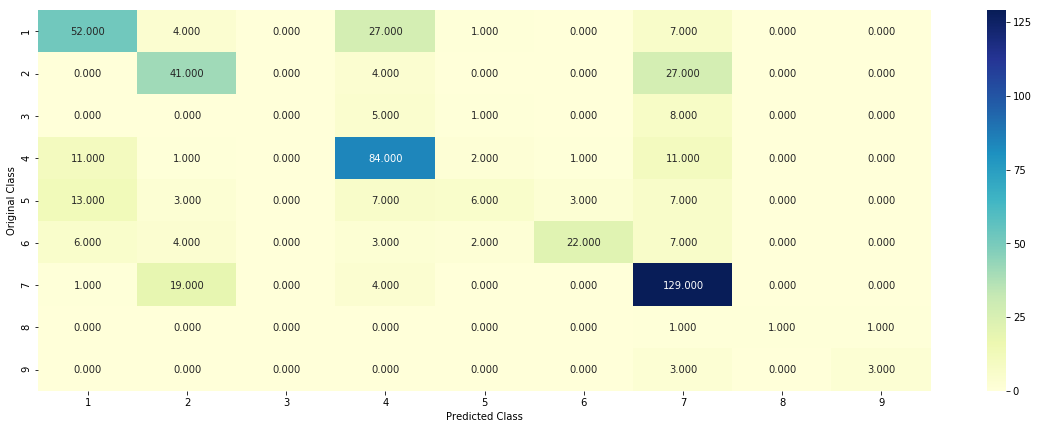

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


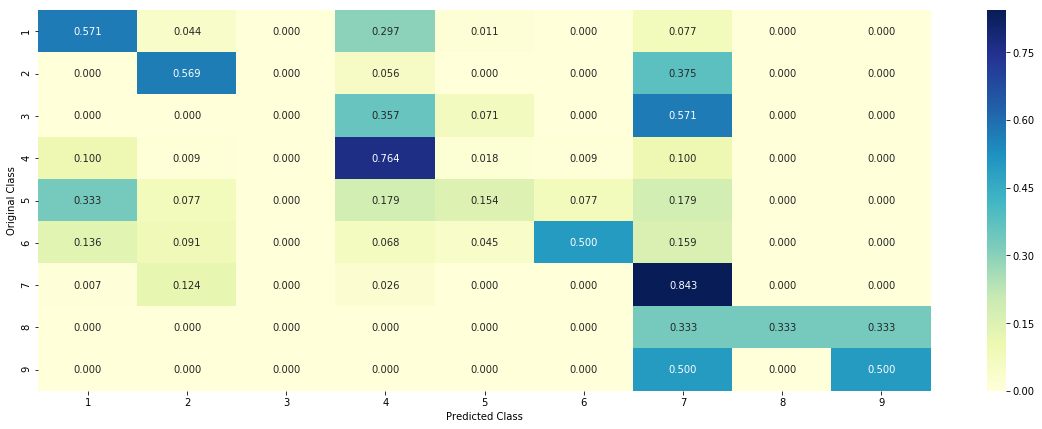

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


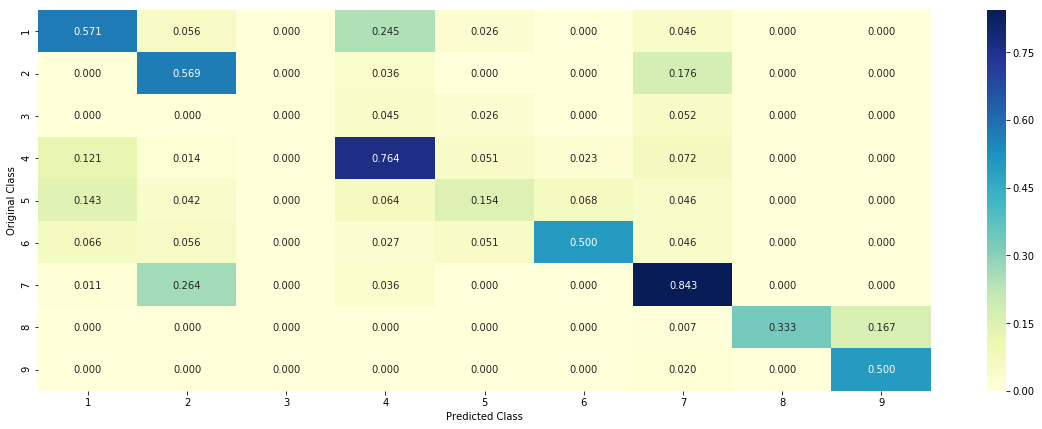

In [69]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_tfidfVectorizer, y_train, cv_x_tfidfVectorizer, y_cv, clf)

#### Feature Importance, Sample Query Point-1

In [70]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_tfidfVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, y_train)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidfVectorizer[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], X_test['Text'].iloc[test_point_index], X_test['Gene'].iloc[test_point_index], X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0386 0.1917 0.0206 0.0199 0.0428 0.0337 0.6438 0.0053 0.0035]]
Actual Class : 7
--------------------------------------------------
0 Text feature [activation] present in test data point [True]
1 Text feature [kinase] present in test data point [True]
2 Text feature [activating] present in test data point [True]
3 Text feature [inhibitors] present in test data point [True]
4 Text feature [inhibitor] present in test data point [True]
5 Text feature [activated] present in test data point [True]
6 Text feature [tyrosine] present in test data point [True]
7 Text feature [treatment] present in test data point [True]
8 Text feature [constitutive] present in test data point [True]
9 Text feature [phosphorylation] present in test data point [True]
11 Text feature [therapeutic] present in test data point [True]
12 Text feature [signaling] present in test data point [True]
13 Text feature [therapy] present in test data point [True]
14 Text fe

#### Sample Query Point-2

In [71]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidfVectorizer[test_point_index]),4))
print("Actuall Class :", y_test[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index], X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.1614 0.2218 0.028  0.2104 0.0713 0.0581 0.2326 0.0087 0.0078]]
Actuall Class : 7
--------------------------------------------------
0 Text feature [activation] present in test data point [True]
1 Text feature [kinase] present in test data point [True]
4 Text feature [inhibitor] present in test data point [True]
7 Text feature [treatment] present in test data point [True]
9 Text feature [phosphorylation] present in test data point [True]
10 Text feature [function] present in test data point [True]
11 Text feature [therapeutic] present in test data point [True]
12 Text feature [signaling] present in test data point [True]
13 Text feature [therapy] present in test data point [True]
16 Text feature [downstream] present in test data point [True]
20 Text feature [nonsense] present in test data point [True]
25 Text feature [proliferation] present in test data point [True]
27 Text feature [treated] present in test data point [True]
28 Text

### GBDT Classifier

In [ ]:
#Gradient Boosting Classifier.
from sklearn.ensemble import GradientBoostingClassifier
'''alpha = [100,200,500,1000,2000]
cv_log_error_array = []
for i in alpha:
    print("for n_estimators =", i)
    clf = GradientBoostingClassifier(n_estimators=i, random_state=42)
    clf.fit(train_x_tfidfVectorizer, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidfVectorizer, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidfVectorizer)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs))
    '''

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = 1000
clf = GradientBoostingClassifier(n_estimators=best_alpha, random_state=42)
clf.fit(train_x_tfidfVectorizer, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, train_y)

predict_y = sig_clf.predict_proba(train_x_tfidfVectorizer)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidfVectorizer)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidfVectorizer)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

### Stack the Model

#### HyperParameter Tuning

In [67]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#------------------------------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# -------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier

clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_tfidfVectorizer, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_tfidfVectorizer, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_tfidfVectorizer, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_tfidfVectorizer, y_train)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(y_cv, sig_clf1.predict_proba(cv_x_tfidfVectorizer))))
sig_clf2.fit(train_x_tfidfVectorizer, y_train)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf2.predict_proba(cv_x_tfidfVectorizer))))
sig_clf3.fit(train_x_tfidfVectorizer, y_train)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf3.predict_proba(cv_x_tfidfVectorizer))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_tfidfVectorizer, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_cv, sclf.predict_proba(cv_x_tfidfVectorizer))))
    log_error =log_loss(y_cv, sclf.predict_proba(cv_x_tfidfVectorizer))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.08
Support vector machines : Log Loss: 1.51
Naive Bayes : Log Loss: 1.24
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.178
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.032
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.492
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.129
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.231
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.465


#### Testing Model with best HyperParameter

Log loss (train) on the stacking classifier : 0.6352527733500668
Log loss (CV) on the stacking classifier : 1.1289416428156709
Log loss (test) on the stacking classifier : 1.1134997957498218
Number of missclassified point : 0.3473684210526316
-------------------------------------------------- Confusion Matrix --------------------------------------------------


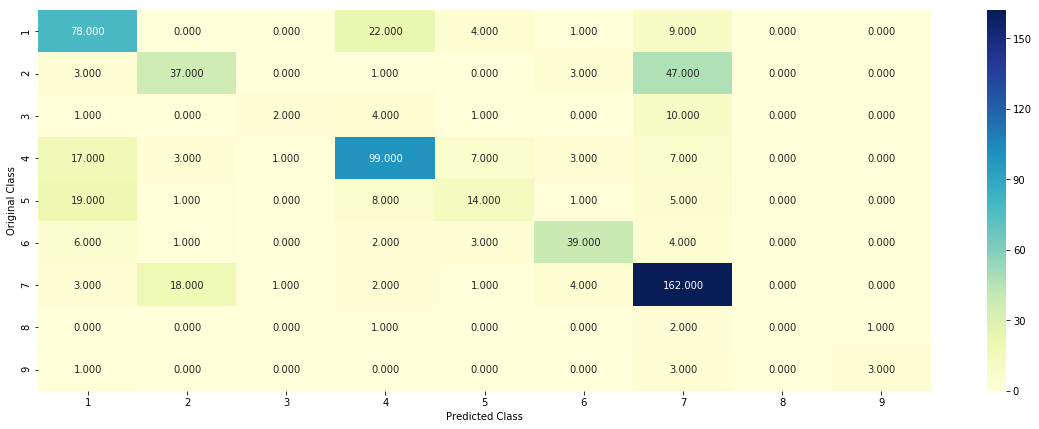

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


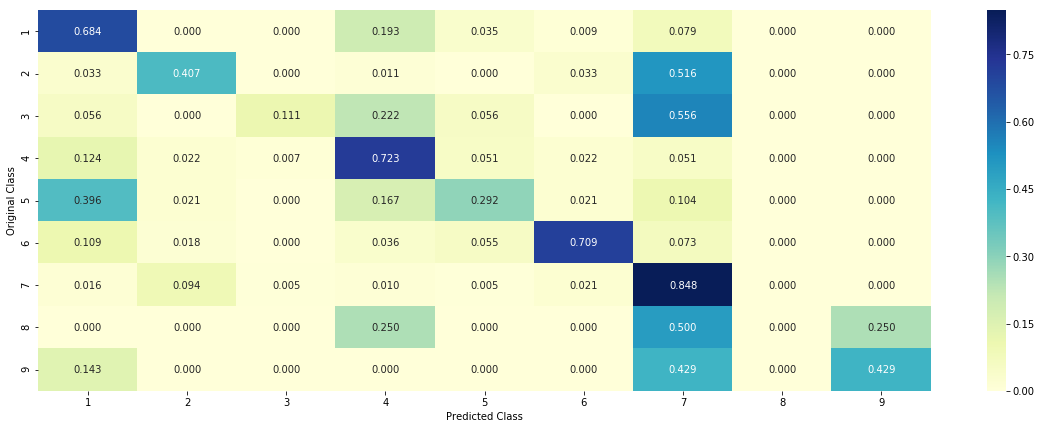

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


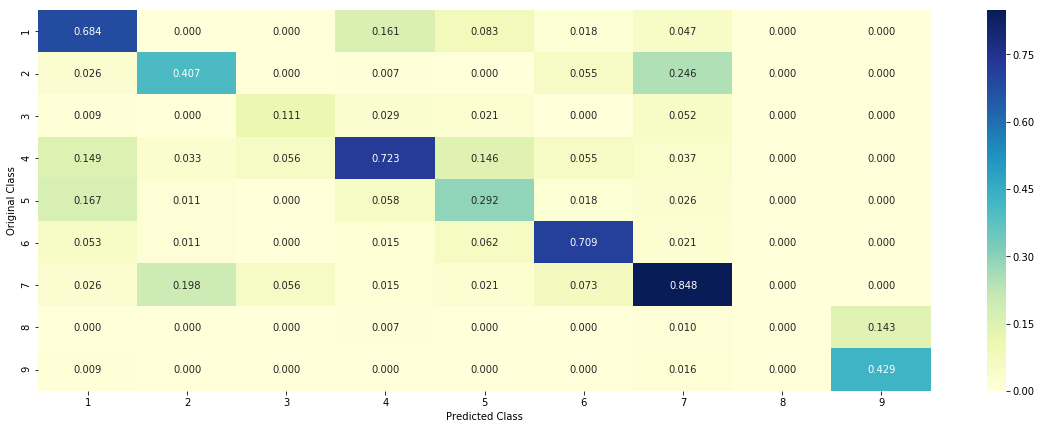

In [68]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_tfidfVectorizer, y_train)

log_error = log_loss(y_train, sclf.predict_proba(train_x_tfidfVectorizer))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(y_cv, sclf.predict_proba(cv_x_tfidfVectorizer))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(y_test, sclf.predict_proba(test_x_tfidfVectorizer))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_tfidfVectorizer)- y_test))/y_test.shape[0])
plot_confusion_matrix(test_y=y_test, predict_y=sclf.predict(test_x_tfidfVectorizer))

### Maximun Voting Classifier

Log loss (train) on the VotingClassifier : 0.8659384383739696
Log loss (CV) on the VotingClassifier : 1.1077683130500215
Log loss (test) on the VotingClassifier : 1.1738786901657512
Number of missclassified point : 0.35789473684210527
-------------------------------------------------- Confusion Matrix --------------------------------------------------


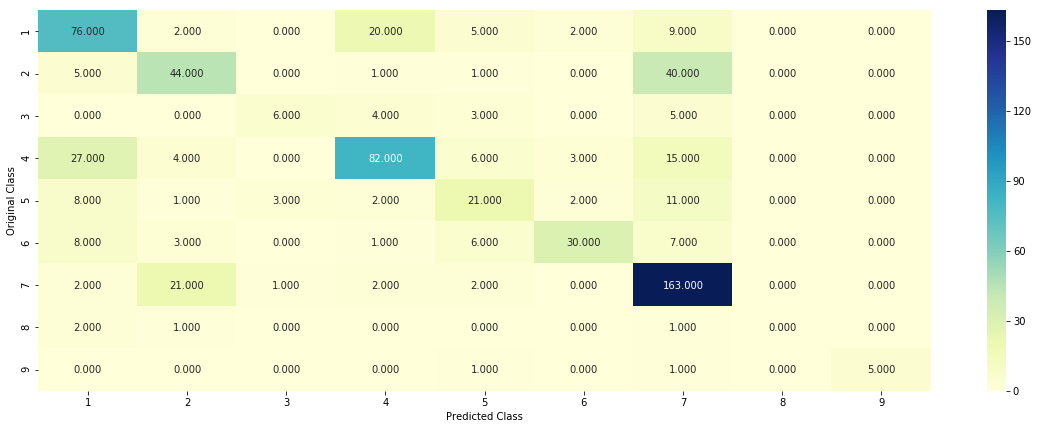

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


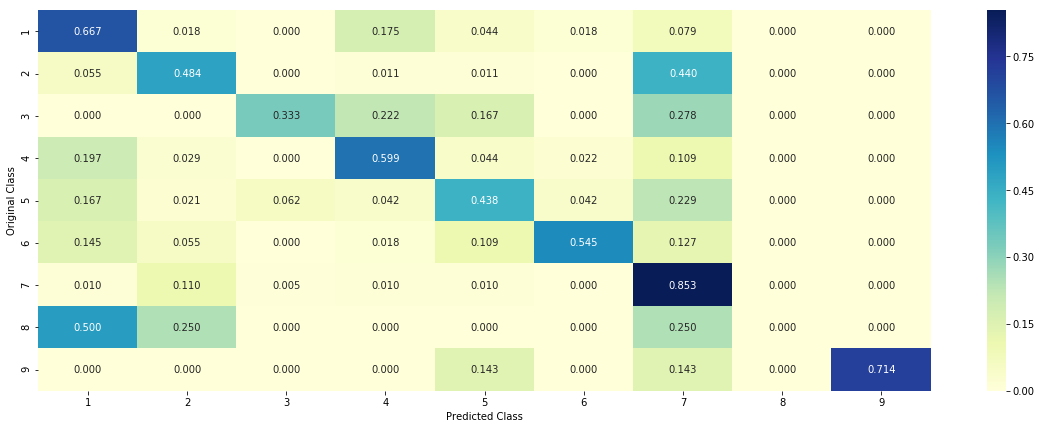

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


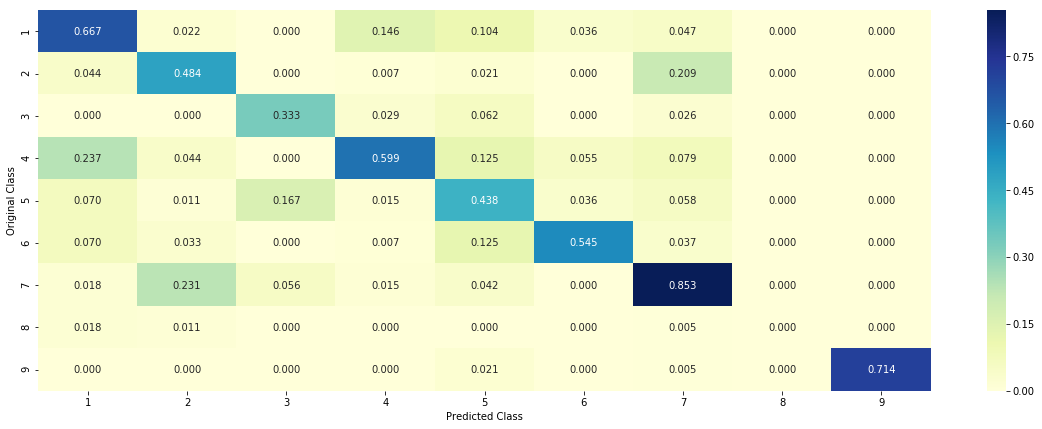

In [74]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_tfidfVectorizer, y_train)
print("Log loss (train) on the VotingClassifier :", log_loss(y_train, vclf.predict_proba(train_x_tfidfVectorizer)))
print("Log loss (CV) on the VotingClassifier :", log_loss(y_cv, vclf.predict_proba(cv_x_tfidfVectorizer)))
print("Log loss (test) on the VotingClassifier :", log_loss(y_test, vclf.predict_proba(test_x_tfidfVectorizer)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_tfidfVectorizer)- y_test))/y_test.shape[0])
plot_confusion_matrix(test_y= y_test, predict_y=vclf.predict(test_x_tfidfVectorizer))

### XGBoost Classifier

In [69]:
from xgboost import XGBClassifier
clf = XGBClassifier(max_depth=5, objective='multi:softprob', learning_rate=0.05)
clf.fit(train_x_tfidfVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, y_train)

predict_y = sig_clf.predict_proba(cv_x_tfidfVectorizer)
print("The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidfVectorizer)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

The cross validation log loss is: 1.1893580540993105
The test log loss is: 1.1146947658825173
